# HW4 SSMs

Tony Wang

Coding part

## T1: Pendulum problem

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys


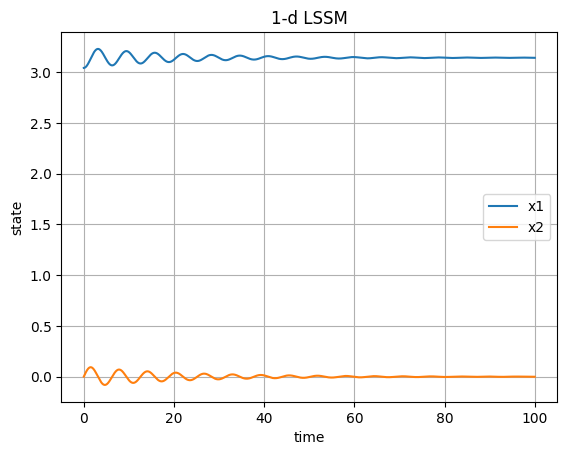

In [28]:
### 1-d LSSM 
num_steps  = 10000
delta_t = 0.01
x1_0 = np.pi - 0.1
x2_0 = 0.0
C = 0.1
# Sinusoidal input
amplitude = 0
frequency = 0.5
# Sinusoidal input over time
u = amplitude *np.sin( frequency *np. arange ( num_steps ) )

x1  = np.zeros(num_steps)
x2 = np.zeros(num_steps)

for i in range(num_steps):
    x1[i] = x1_0 + delta_t * x2_0
    x2[i] = x2_0 + delta_t * (np.sin(x1_0) - C *x2_0 + u[i])
    x1_0 = x1[i]
    x2_0 = x2[i]

# plot the results
plt.figure()
plt.plot(np.arange(num_steps)*delta_t, x1, label='x1')
plt.plot(np.arange(num_steps)*delta_t, x2, label='x2')
plt.title('1-d LSSM')
plt.xlabel('time')
plt.ylabel('state')
plt.legend()
plt.grid()
plt.show()


Part (d)

The plot shows the evolution of the angle \( x_1 \) over time with zero input torque. Initially, the pendulum undergoes damped oscillations due to the friction coefficient \( c = 0.1 \). Over time, these oscillations decay, and the pendulum approaches a stable equilibrium position around \( x_1 = 0 \) (vertical position). This behavior indicates that the system is stable under these conditions and naturally returns to equilibrium due to damping.



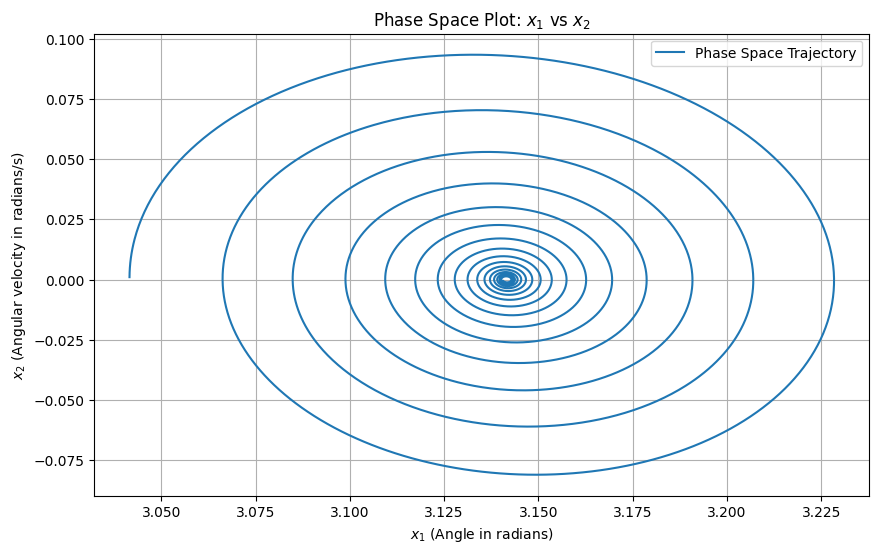

In [29]:
# Phase space plot (x1 vs x2)
plt.figure(figsize=(10, 6))
plt.plot(x1, x2, label='Phase Space Trajectory')
plt.title('Phase Space Plot: $x_1$ vs $x_2$')
plt.xlabel('$x_1$ (Angle in radians)')
plt.ylabel('$x_2$ (Angular velocity in radians/s)')
plt.legend()
plt.grid(True)
plt.show()


Part (e): Phase Space Plot

The phase space plot shows the trajectory of the pendulum in the \( (x_1, x_2) \) space, where \( x_1 \) is the angle and \( x_2 \) is the angular velocity. The spiral inward pattern indicates that the pendulum’s motion is damped. As time progresses, the trajectory spirals toward the origin, where both the angle and angular velocity reach zero, representing the stable equilibrium position. This visualization reaffirms the damping effect in the system, causing it to stabilize

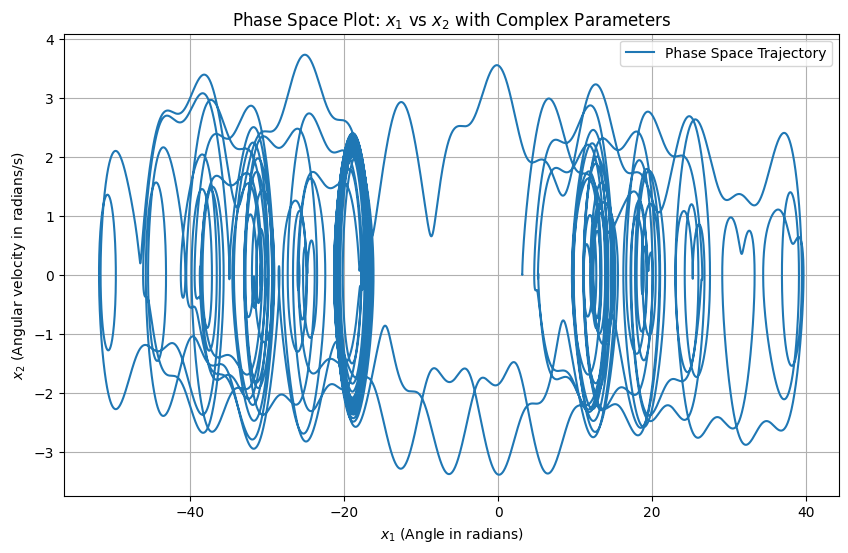

In [30]:
# (f)
delta_t = 0.01
num_steps = 100000
c = 0.01  # Reduced friction coefficient

# Sinusoidal input with specified amplitude and frequency
amplitude = 1
frequency = 0.01
u = amplitude * np.sin(frequency * np.arange(num_steps))

# Initialize arrays to store x1 and x2 with new initial conditions
x1 = np.zeros(num_steps)
x2 = np.zeros(num_steps)
x1[0] = x1_0
x2[0] = x2_0

# Run the simulation for the updated parameters
for k in range(1, num_steps):
    # Apply the discrete-time update equations
    x1[k] = x1[k-1] + delta_t * x2[k-1]
    x2[k] = x2[k-1] + delta_t * (-c * x2[k-1] - np.sin(x1[k-1]) + u[k-1])

# Phase space plot (x1 vs x2) for part (f)
plt.figure(figsize=(10, 6))
plt.plot(x1, x2, label='Phase Space Trajectory')
plt.title('Phase Space Plot: $x_1$ vs $x_2$ with Complex Parameters')
plt.xlabel('$x_1$ (Angle in radians)')
plt.ylabel('$x_2$ (Angular velocity in radians/s)')
plt.legend()
plt.grid(True)
plt.show()


###  (f): Complex Behavior in the Pendulum

With a reduced friction coefficient, larger input amplitude, and a low-frequency sinusoidal input, the phase space plot exhibits irregular and complex trajectories. This suggests that the pendulum no longer settles into a stable equilibrium or periodic oscillation but instead shows potentially chaotic behavior. The pendulum's angle and velocity vary widely, indicating sensitive dependence on initial conditions and the external input.

In physical terms, this behavior could mean that the pendulum, under these conditions, does not stabilize or settle into regular oscillations. Instead, it might exhibit irregular, possibly chaotic oscillations, where it does not return to a predictable path. This demonstrates how certain parameter choices can induce complex dynamics in otherwise stable systems, typical in nonlinear dynamical systems like pendulums with external forcing.

## T2


In [31]:
import numpy as np

def simulate_hmm(pi, A, B, num_steps):
    """
    Simulate hidden states and observations from an HMM.

    Parameters:
    - pi: Initial state distribution (array of size N)
    - A: State transition matrix (N x N)
    - B: Emission matrix (N x M)
    - num_steps: Number of time steps to simulate

    Returns:
    - states: List of hidden states (length num_steps)
    - observations: List of observations (length num_steps)
    """
    N = len(pi)  # Number of states
    M = B.shape[1]  # Number of observations

    # Initialize lists to store states and observations
    states = []
    observations = []

    # Initial state
    state = np.random.choice(np.arange(N), p=pi)
    states.append(state)

    # Generate initial observation
    observation = np.random.choice(np.arange(M), p=B[state])
    observations.append(observation)

    for t in range(1, num_steps):
        # Transition to next state
        state = np.random.choice(np.arange(N), p=A[states[-1]])
        states.append(state)

        # Generate observation from the current state
        observation = np.random.choice(np.arange(M), p=B[state])
        observations.append(observation)

    return states, observations

# HMM parameters
pi = np.array([0.8, 0.15, 0.05]).T
A = np.array([
    [0.7, 0.2, 0.1],
    [0.1, 0.8, 0.1],
    [0.05, 0.15, 0.8]
])
B = np.array([
    [0.9, 0.08, 0.02],
    [0.3, 0.6, 0.1],
    [0.1, 0.3, 0.6]
])

# Simulate the HMM
num_steps = 20  # Number of time steps to simulate
states, observations = simulate_hmm(pi, A, B, num_steps)

# Map state indices to state names
state_names = {0: 'Normal Operation!', 1: 'Minor Fault', 2: 'Severe Fault'}
observation_names = {0: 'Low Vibration', 1: 'Medium Vibration', 2: 'High Vibration'}

print("Time\tState\t\t\tObservation")
for t in range(num_steps):
    print(f"{t}\t{state_names[states[t]]}\t{observation_names[observations[t]]}")


Time	State			Observation
0	Normal Operation!	Low Vibration
1	Normal Operation!	Low Vibration
2	Normal Operation!	Low Vibration
3	Severe Fault	High Vibration
4	Minor Fault	Medium Vibration
5	Minor Fault	Medium Vibration
6	Minor Fault	Medium Vibration
7	Minor Fault	Medium Vibration
8	Normal Operation!	High Vibration
9	Normal Operation!	Low Vibration
10	Normal Operation!	Low Vibration
11	Normal Operation!	Low Vibration
12	Minor Fault	Low Vibration
13	Minor Fault	Medium Vibration
14	Minor Fault	Medium Vibration
15	Minor Fault	Medium Vibration
16	Minor Fault	Medium Vibration
17	Severe Fault	Low Vibration
18	Severe Fault	Medium Vibration
19	Severe Fault	Medium Vibration


In [32]:
def decode_observations(B, observations):
    decoded_states = []
    for obs in observations:
        state = np.argmax( B[:, obs])
        decoded_states.append(state)
    return decoded_states

decoded_states = decode_observations(B, observations)

print("Decoded States:")
for t in range(num_steps):
    print(f"{t}\t{state_names[decoded_states[t]]}\t {observation_names[observations[t]]}")


Decoded States:
0	Normal Operation!	 Low Vibration
1	Normal Operation!	 Low Vibration
2	Normal Operation!	 Low Vibration
3	Severe Fault	 High Vibration
4	Minor Fault	 Medium Vibration
5	Minor Fault	 Medium Vibration
6	Minor Fault	 Medium Vibration
7	Minor Fault	 Medium Vibration
8	Severe Fault	 High Vibration
9	Normal Operation!	 Low Vibration
10	Normal Operation!	 Low Vibration
11	Normal Operation!	 Low Vibration
12	Normal Operation!	 Low Vibration
13	Minor Fault	 Medium Vibration
14	Minor Fault	 Medium Vibration
15	Minor Fault	 Medium Vibration
16	Minor Fault	 Medium Vibration
17	Normal Operation!	 Low Vibration
18	Minor Fault	 Medium Vibration
19	Minor Fault	 Medium Vibration


In [33]:
given_seq = [1, 1, 2, 3, 3, 2, 1, 1, 2, 3]
# adjust to 0-based indexing
ob_seq = [i-1 for i in given_seq]
print(ob_seq)

dec_seq = decode_observations(B, ob_seq)

print("Estimated hidden states: ")
for t,ob in enumerate(ob_seq):
    print(f"{t}\t{observation_names[ob]}\t {state_names[dec_seq[t]]}")


[0, 0, 1, 2, 2, 1, 0, 0, 1, 2]
Estimated hidden states: 
0	Low Vibration	 Normal Operation!
1	Low Vibration	 Normal Operation!
2	Medium Vibration	 Minor Fault
3	High Vibration	 Severe Fault
4	High Vibration	 Severe Fault
5	Medium Vibration	 Minor Fault
6	Low Vibration	 Normal Operation!
7	Low Vibration	 Normal Operation!
8	Medium Vibration	 Minor Fault
9	High Vibration	 Severe Fault


In [34]:
# 2-d
def compute_seq_prob(pi, A, B, states):
    prob = pi[states[0]] 
    for t in range(1, len(states)):
        prob *= A[states[t-1], states[t]]
    return prob
probability = compute_seq_prob(pi, A, B, dec_seq)

print(f"Probability of the estimated hidden state sequence: {probability:.6e}")


Probability of the estimated hidden state sequence: 1.881600e-06


In [35]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([
    [0.5, 0.25, 0.125],
    [1.0, 0.0, 0.0],
    [0.0, 1.0, 0.0]
])
B = np.array([[1], [0], [0]])
C = np.array([1.0, 1.0, 1.0])  # Observation matrix

eigenvalues = np.linalg.eigvals(A)
print("Eigenvalues of A:")
print(eigenvalues)

Eigenvalues of A:
[ 0.91964338+0.j         -0.20982169+0.30314536j -0.20982169-0.30314536j]


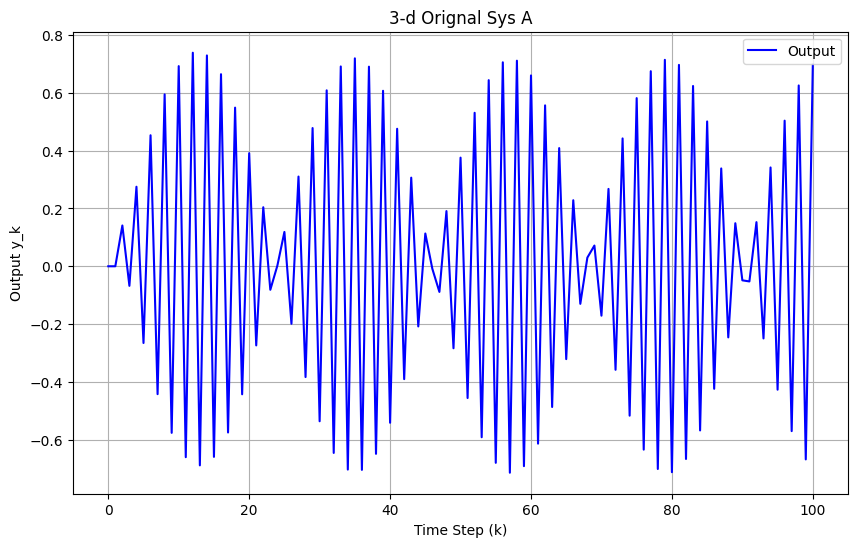

In [36]:
# 3-d CCF case 
def sys_dynamic_3(A, C, name, num_steps=100, x0=None):
    def u(k):
        return np.sin(3 * k)
    x = np.zeros((A.shape[0], num_steps + 1))
    y = np.zeros(num_steps + 1)
    x[:, 0] = np.zeros(3) if x0 is None else x0

    for k in range(num_steps):
        x[:, k+1] = A @ x[:, k] + np.array([u(k), 0, 0])
        y[k] = C @ x[:, k]
    y[num_steps] = C @ x[:, num_steps]  # Final output
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(num_steps + 1), y, 'b-', label='Output')
    plt.xlabel('Time Step (k)')
    plt.ylabel('Output y_k')
    plt.title(name)
    plt.grid(True)
    plt.legend()
    plt.show()
    
    return x, y

x, y = sys_dynamic_3(A, C, '3-d Orignal Sys A')

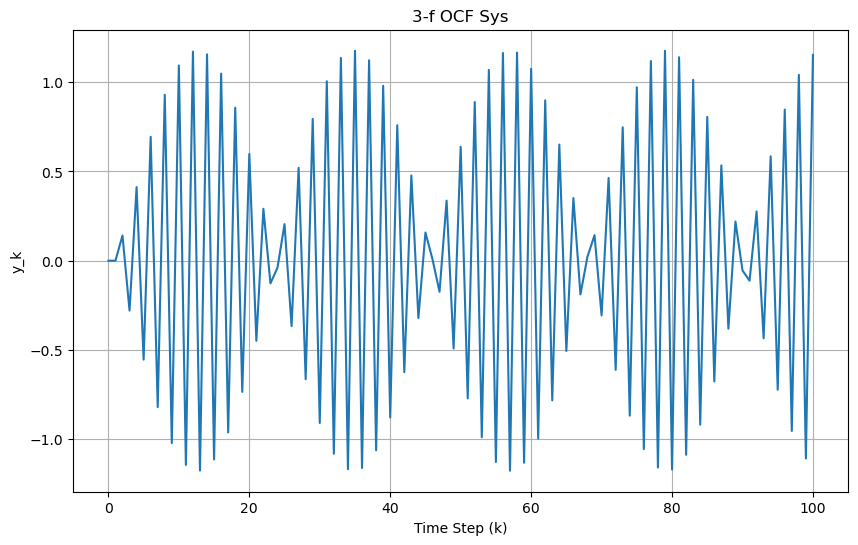

In [34]:
# 3-f OCF case
A_o = np.array([
    [0.0, 0.0, -0.125],
    [1.0, 0.0, -0.25],
    [0.0, 1.0, -0.5]
])
b_o = np.array([1.0, 0.0, 0.0])
C_o = np.array([1.0, 0.0, 0.0])
xi0 = np.zeros(3)

num_steps = 100
xi = np.zeros((3, num_steps + 1))
y_o = np.zeros(num_steps + 1)
xi[:, 0] = xi0

def u(k):
    return np.sin(3 * k)

for k in range(num_steps):
    xi[:, k+1] = A_o @ xi[:, k] + b_o * u(k)
    y_o[k] = C_o @ xi[:, k]

y_o[num_steps] = C_o @ xi[:, num_steps]

plt.figure(figsize=(10, 6))
plt.plot(range(num_steps + 1), y_o)
plt.xlabel('Time Step (k)')
plt.ylabel('y_k')
plt.title('3-f OCF Sys')
plt.grid(True)
plt.show()
